In [47]:
from sklearn.datasets import load_iris
import pandas as pd

In [49]:
iris = load_iris()

In [51]:
df = pd.DataFrame(data = iris.data,columns = ['sepal_length','sepal_width','petal_length','petal_width'])

In [53]:
df['species'] = iris.target

In [68]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df[['species']]

<Axes: xlabel='count'>

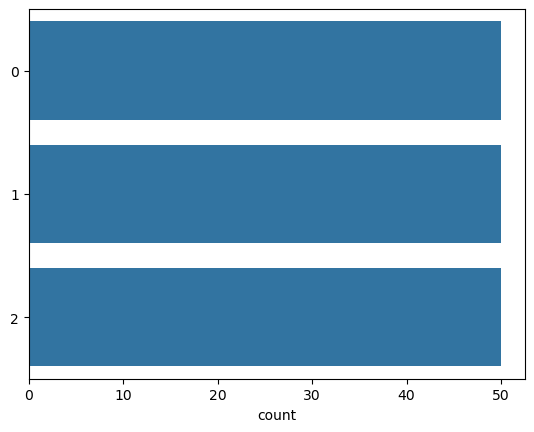

In [76]:
import seaborn as sns
sns.countplot(y = iris.target,data = df)

<Axes: >

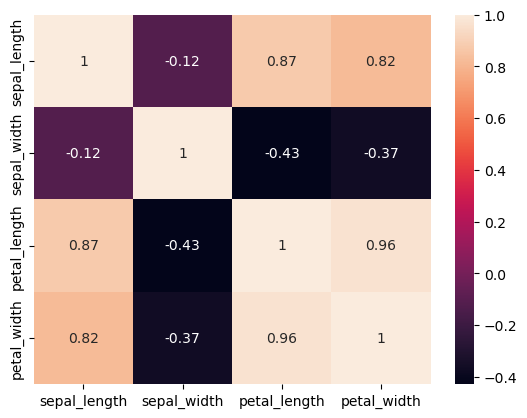

In [80]:
sns.heatmap(X.corr(), annot = True)

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [86]:
x_scaled = scaler.fit_transform(X)

In [90]:
import numpy as np
feat = x_scaled.T
cov_mat = np.cov(feat)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [92]:
values,vectors = np.linalg.eig(cov_mat)


In [94]:
proj1 = x_scaled.dot(vectors.T[0])
proj2 = x_scaled.dot(vectors.T[1])

In [96]:
res = pd.DataFrame(data = proj1, columns = ['PC1'])
res['PC2'] = proj2
res['species'] = Y
res

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


In [98]:
X = res[['PC1','PC2']]

<Axes: >

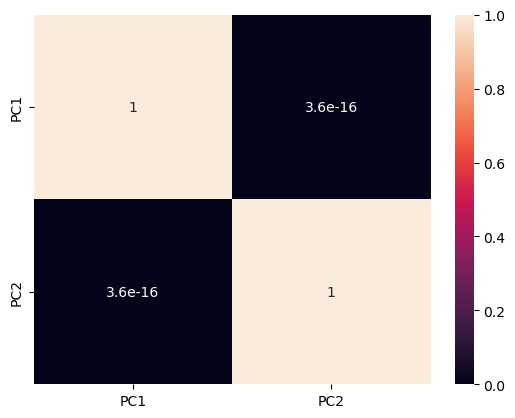

In [100]:
sns.heatmap(X.corr(),annot = True)

<Axes: xlabel='PC1', ylabel='PC2'>

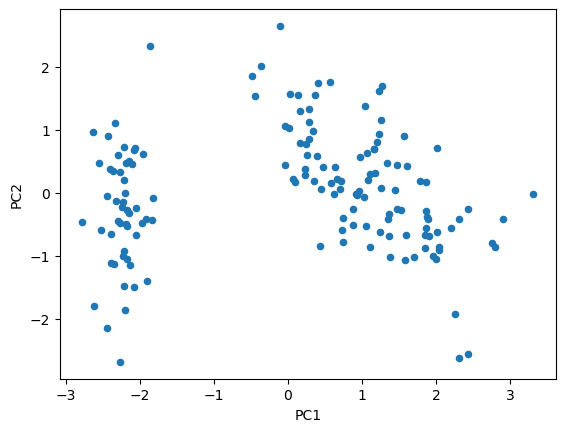

In [102]:
res.plot(kind = 'scatter', x = 'PC1', y = 'PC2')